# Preprocessing + Random Forest


In [ ]:
#need to mount drive so that files can be accessed from folder
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#packages to load
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import numpy as np
from scipy.stats import poisson
from seaborn.widgets import plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
#Custom palette for graphs
colors = ['#708090', '#FF0000', '#FFFAFA', '#9370DB',
          '#006400', '#FFDEAD', '#6495ED', '#FF8C00',
          '#FFC0CB', '#7FFF00', '#00008B', '#7FFFD4',
          '#FFFF00', '#800000']
conditions = ['Control', 'Penicillin', 'Streptomycin', 'Pen/Strep',
              'Levofloxacin', 'Clindamycin', 'Metronidazole', 'Cefepime',
              'Vancomycin', 'Pip/Tazo', 'Purified Diet', 'Western Diet',
              'Ketogenic Diet', ' EFA-D Diet']
# Set your custom color palette
customPalette = sns.set_palette(sns.color_palette(colors))

In [ ]:
#import metabolomics data
path = "/content/gdrive/MyDrive/Colab Notebooks/DataFiles/MLProcessedData/"

metabolomics_data = pd.read_csv(path +'log10metabolomicsprocesseddata_06152023')
#mss_data = pd.read_csv(path +'MSS_processed_Data')
metabolomics_data['Treatment'].unique()

array(['NoABX', 'Pen', 'Strep', 'PenStrep', 'Levo', 'Clinda', 'Metro',
       'Cefe', 'Vanc', 'PipTazo', 'Western', 'Purified', 'EFA', 'Keto'],
      dtype=object)

In [ ]:
#replace treatment names
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('NoABX', 'Control')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Pen', 'Penicillin')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Strep', 'Streptomycin')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('PenStrep', 'Pen/Strep')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Levo', 'Levofloxacin')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Clinda', 'Clindamycin')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Metro', 'Metronidazole')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Cefe', 'Cefepime')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Vanc', 'Vancomycin')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('PipTazo', 'Pip/Tazo')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Western', 'Western Diet')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Purified', 'Purified Diet')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('EFA', 'EFA-D Diet')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('Keto', 'Ketogenic Diet')
metabolomics_data['Treatment']= metabolomics_data['Treatment'].str.replace('PenicillinStreptomycin', 'Pen/Strep')

In [ ]:
metabolomics_data1 = metabolomics_data.drop(columns=['Unnamed: 0', 'Sample'])
metabolomics_data1

,Sample Number,Treatment,Candida Levels,55.0189,57.0348,59.014,66.0347,69.0347,71.014,73.0296,...,976.5074,979.5474,995.9009,1000.3734,1008.8013,1023.3639,1024.307,1024.5068,1028.4828,1048.3279
0,sample1,Control,4.287802,3.341731,3.880070,4.868103,3.211254,3.929061,3.952841,3.692715,...,3.449556,3.512818,3.372544,3.296775,3.550351,3.308137,3.264227,3.397853,3.354780,3.171580
1,sample2,Control,5.322219,3.420781,3.920958,4.940233,3.137671,3.962061,3.962369,3.766041,...,3.465532,3.559966,3.425371,3.307496,3.530264,3.331022,3.238172,3.451326,3.359361,3.201534
2,sample3,Control,4.113943,3.408833,3.888432,4.915701,3.154576,3.971925,3.879440,3.864422,...,3.410440,3.469012,3.431122,3.359171,3.560743,3.272306,3.245142,3.455378,3.414054,3.163310
3,sample4,Control,5.230449,3.250786,3.921842,4.938059,3.077186,3.938895,3.902275,3.733879,...,3.420863,3.475163,3.342028,3.377852,3.453089,3.180986,3.234264,3.308778,3.337459,3.154272
4,sample5,Control,4.614897,3.254306,3.891342,4.879067,3.151676,3.948462,3.901540,3.704965,...,3.634679,3.561936,3.368473,3.347037,3.416557,3.478061,3.247114,3.474216,3.418964,3.317018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,sample103,Ketogenic Diet,3.569374,3.281828,3.850861,4.886274,3.337160,3.918319,3.853333,3.575130,...,3.402261,3.466274,3.372636,3.276577,3.500442,3.326745,3.203848,3.349375,3.394189,3.220239
101,sample104,Ketogenic Diet,4.575188,3.264582,3.762754,4.748994,3.188507,3.847388,3.851931,3.600319,...,3.415641,3.512084,3.450480,3.250542,3.410946,3.278411,3.235655,3.393926,3.339650,3.358791
102,sample105,Ketogenic Diet,4.788875,3.244525,3.635936,4.735100,3.151829,3.877458,3.711132,3.520090,...,3.443419,3.551999,3.467978,3.326131,3.435367,3.269630,3.289254,3.390582,3.485082,3.265407
103,sample106,Ketogenic Diet,0.000000,3.352279,3.697273,4.736803,3.255031,3.850462,3.849235,3.440594,...,3.539013,3.569491,3.432969,3.383636,3.428378,3.346059,3.254306,3.508664,3.498655,3.292810


In [ ]:
metabolomics_data1.to_csv(path+'metabolomicsdata-07022023.csv')

In [ ]:
q_melt = metabolomics_data1.melt(id_vars=['Sample Number', 'Treatment', 'Candida Levels'])
q_melt

,Sample Number,Treatment,Candida Levels,variable,value
0,sample1,Control,4.287802,55.0189,3.341731
1,sample2,Control,5.322219,55.0189,3.420781
2,sample3,Control,4.113943,55.0189,3.408833
3,sample4,Control,5.230449,55.0189,3.250786
4,sample5,Control,4.614897,55.0189,3.254306
...,...,...,...,...,...
154555,sample103,Ketogenic Diet,3.569374,1048.3279,3.220239
154556,sample104,Ketogenic Diet,4.575188,1048.3279,3.358791
154557,sample105,Ketogenic Diet,4.788875,1048.3279,3.265407
154558,sample106,Ketogenic Diet,0.000000,1048.3279,3.292810


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Control'),
  Text(1, 0, 'Penicillin'),
  Text(2, 0, 'Streptomycin'),
  Text(3, 0, 'Pen/Strep'),
  Text(4, 0, 'Levofloxacin'),
  Text(5, 0, 'Clindamycin'),
  Text(6, 0, 'Metronidazole'),
  Text(7, 0, 'Cefepime'),
  Text(8, 0, 'Vancomycin'),
  Text(9, 0, 'Pip/Tazo'),
  Text(10, 0, 'Western Diet'),
  Text(11, 0, 'Purified Diet'),
  Text(12, 0, 'EFA-D Diet'),
  Text(13, 0, 'Ketogenic Diet')])

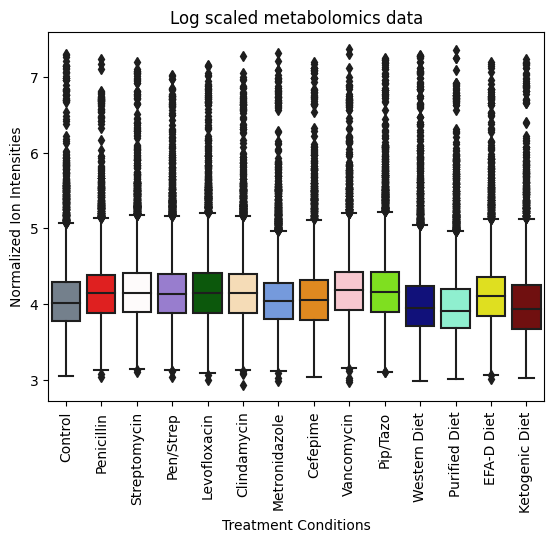

In [ ]:
ax = sns.boxplot(data=q_melt, x="Treatment", y = 'value')
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.ylabel("Normalized Ion Intensities", size=10)
plt.xlabel("Treatment Conditions", size=10)
plt.title("Log scaled metabolomics data", size=12)
plt.xticks(rotation=90)
#plt.savefig(path+'normalized_metabolomics_boxplot_05302023.png', dpi=800, bbox_inches='tight')

In [ ]:
#pca calculation for data visualization
# Separating out the features
x = metabolomics_data1.iloc[:, 3:].values
# Separating out the target
y = metabolomics_data1.loc[:,['Treatment']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, metabolomics_data1[['Treatment']]], axis = 1)
pca.explained_variance_ratio_

array([0.36581651, 0.13526364])

<ipython-input-11-f67db6e6f025>:9: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for ha in ax.legend_.legendHandles:


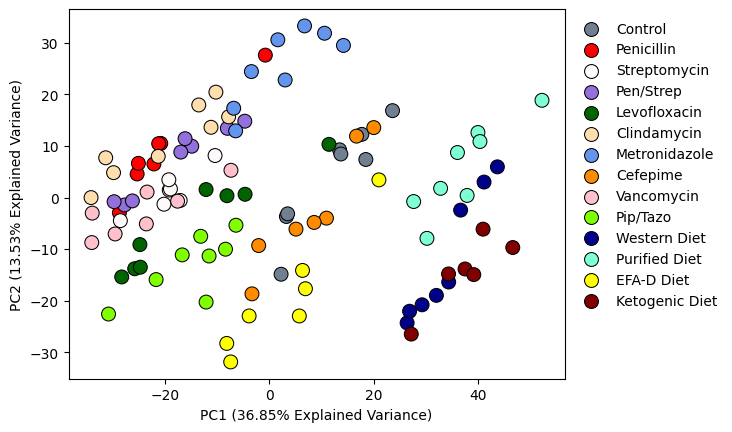

In [ ]:
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.75, # line width of spot
             #'linestyle':'--', # line style of spot
            }
ax=sns.scatterplot(data=finalDf, x="principal component 1", y="principal component 2", hue='Treatment', s=100, **kwargs)
# Place the legend
lgd = ax.legend(frameon=False)
# Modify the point edge colour
for ha in ax.legend_.legendHandles:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.75)
    ha._sizes = [100]

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('PC1 (36.85% Explained Variance)')
plt.ylabel('PC2 (13.53% Explained Variance)')

plt.savefig(path+'log10normalized_metabolomics_pca_06302023.png', dpi=800, bbox_inches='tight')

In [ ]:
pip install openTSNE

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 53.3 MB/s eta 0:00:00


In [ ]:
from openTSNE import TSNE

tsne = TSNE(
                metric="euclidean",
                n_jobs=8,
                random_state=42,
                verbose=True,
                )
tsne_1 = tsne.fit(principalComponents)


--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, random_state=42, verbose=True)
--------------------------------------------------------------------------------
===> Finding 90 nearest neighbors using exact search using euclidean distance...
   --> Time elapsed: 0.01 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 0.04 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 0.00 seconds
===> Running optimization with exaggeration=12.00, lr=8.75 for 250 iterations...
Iteration   50, KL divergence 1.1677, 50 iterations in 0.0472 sec
Iteration  100, KL divergence 1.1864, 50 iterations in 0.0476 sec
Iteration  150, KL divergence 1.1867, 50 iterations in 0.0468 sec
Iteration  200, KL divergence 1.1861, 50 iterations in 0.0485 sec
Iteration  250, KL divergence 1.1839, 50 iterations in 0.0488 sec
   --> Time elapsed: 0.24 seconds
===> Running optimization with exaggeration=1.00, lr=105.00 

In [ ]:
tsneDf = pd.DataFrame(data = tsne_1
             , columns = ['t-SNE1', 't-SNE2'])
finaltDf = pd.concat([tsneDf, metabolomics_data1[['Treatment']]], axis = 1)
finaltDf

,t-SNE1,t-SNE2,Treatment
0,3.314230,1.191072,Control
1,3.373309,0.998300,Control
2,3.870482,1.622146,Control
3,4.608229,1.865216,Control
4,0.988563,-1.048099,Control
...,...,...,...
100,6.999318,-0.506660,Ketogenic Diet
101,6.249280,-1.455811,Ketogenic Diet
102,7.164465,-1.440280,Ketogenic Diet
103,6.297138,-2.765763,Ketogenic Diet


<ipython-input-16-89af5b52a9b2>:11: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for ha in ax.legend_.legendHandles:


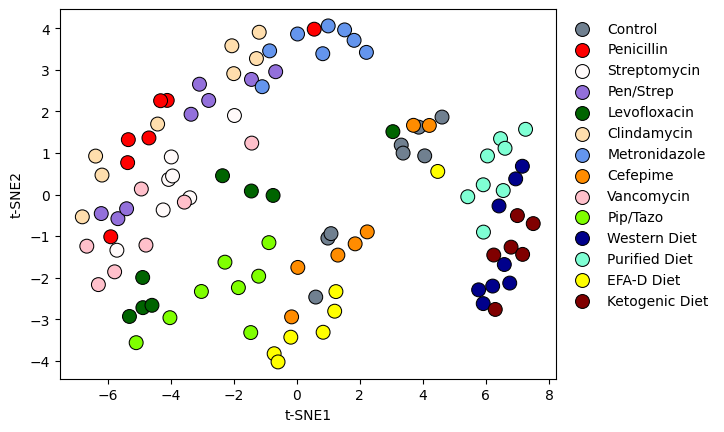

In [ ]:
#tried t-SNE for visualization - not very pretty
#stick with linear dimensionality techniques for metabolomics
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.75, # line width of spot
             #'linestyle':'--', # line style of spot
            }
ax=sns.scatterplot(data=finaltDf, x='t-SNE1', y='t-SNE2', hue='Treatment', s=100, **kwargs)
# Place the legend
lgd = ax.legend(frameon=False)
# Modify the point edge colour
for ha in ax.legend_.legendHandles:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.75)
    ha._sizes = [100]

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('t-SNE1')
plt.ylabel('t-SNE2')

plt.savefig(path+'log10normalized_metabolomics_tsne_06302023.png', dpi=800, bbox_inches='tight')

In [ ]:
#convert string labels to ints for pls-da
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y_num = le.transform(y)
y_num

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


array([ 2,  2,  2,  2,  2,  2,  2,  2,  8,  8,  8,  8,  8,  8,  8, 11, 11,
       11, 11, 11, 11, 11,  7,  7,  7,  7,  7,  7,  7,  7,  5,  5,  5,  5,
        5,  5,  5,  5,  1,  1,  1,  1,  1,  1,  1,  1,  6,  6,  6,  6,  6,
        6,  6,  6,  0,  0,  0,  0,  0,  0,  0, 12, 12, 12, 12, 12, 12, 12,
        9,  9,  9,  9,  9,  9,  9,  9, 13, 13, 13, 13, 13, 13, 13, 13, 10,
       10, 10, 10, 10, 10, 10, 10,  3,  3,  3,  3,  3,  3,  3,  4,  4,  4,
        4,  4,  4])

<ipython-input-18-f5412fdede57>:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for ha in ax.legend_.legendHandles:


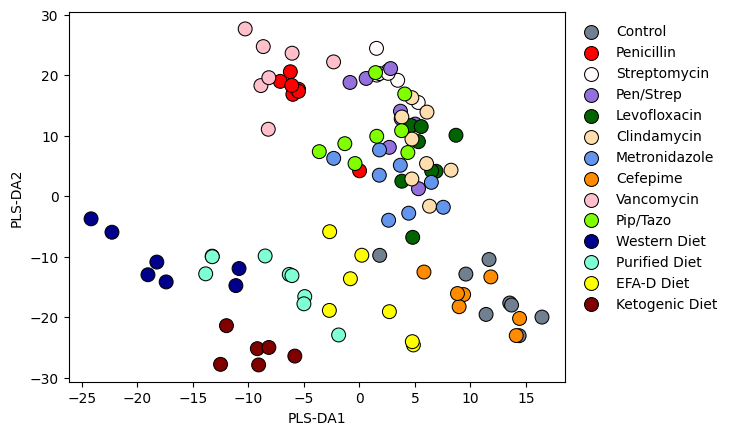

In [ ]:
#PLS-DA Dimensionality reduction
from sklearn.cross_decomposition import PLSRegression
plsr = PLSRegression(n_components=2, scale=False)
plsr.fit(x, y_num)
pldda_Df = pd.DataFrame(data = plsr.x_scores_
             , columns = ['PLS-DA1', 'PLS-DA2'])
final_pls_da_Df = pd.concat([pldda_Df, metabolomics_data1[['Treatment']]], axis = 1)

#PLS-DA Data
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.75, # line width of spot
             #'linestyle':'--', # line style of spot
            }
ax=sns.scatterplot(data=final_pls_da_Df, x='PLS-DA1', y='PLS-DA2', hue='Treatment', s=100, **kwargs)
# Place the legend
lgd = ax.legend(frameon=False)
# Modify the point edge colour
for ha in ax.legend_.legendHandles:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.75)
    ha._sizes = [100]

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('PLS-DA1')
plt.ylabel('PLS-DA2')
plt.savefig(path+'log10normalized_metabolomics_pls-da_06302023.png', dpi=800, bbox_inches='tight')

<ipython-input-19-e10f90773606>:24: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for ha in ax.legend_.legendHandles:


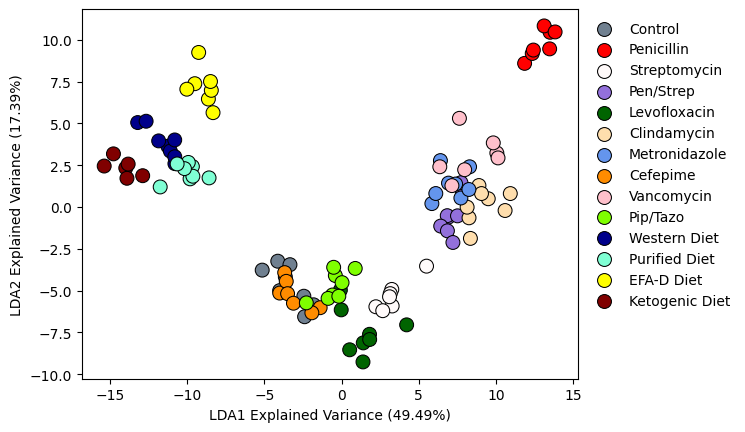

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

clf = LDA()
output = clf.fit_transform(x, y_num)
output.shape
output_2 = output[:, 0:2]

lda_Df = pd.DataFrame(data = output_2, columns = ['LDA1', 'LDA2'])
final_lda_Df = pd.concat([lda_Df, metabolomics_data1[['Treatment']]], axis = 1)
evr = clf.explained_variance_ratio_

evr1 = str(round((clf.explained_variance_ratio_[0]*100), 2))
evr2 = str(round((clf.explained_variance_ratio_[1]*100), 2))

#PLS-DA Data
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.75, # line width of spot
             #'linestyle':'--', # line style of spot
            }
ax=sns.scatterplot(data=final_lda_Df, x='LDA1', y='LDA2', hue='Treatment', s=100, **kwargs)
# Place the legend
lgd = ax.legend(frameon=False)
# Modify the point edge colour
for ha in ax.legend_.legendHandles:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.75)
    ha._sizes = [100]

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('LDA1 Explained Variance (' + evr1 + '%)')
plt.ylabel('LDA2 Explained Variance (' + evr2 + '%)')

plt.savefig(path+'log10normalized_metabolomics_lda_06302023.png', dpi=800, bbox_inches='tight')




17.39

In [ ]:
X= metabolomics_data1.iloc[:,3:].to_numpy()
y = metabolomics_data1['Candida Levels'].to_numpy()
group = metabolomics_data1['Treatment'].to_numpy()

In [ ]:
#import packages
#random forest tuning parameters
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
rf = RandomForestRegressor()
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#optimized parameters from cross-validation -
rf = RandomForestRegressor(random_state = 42, bootstrap = True, max_depth=60, min_samples_leaf=2, min_samples_split=2, n_estimators=50)
rf.fit(X, y)

RandomForestRegressor(max_depth=60, min_samples_leaf=2, n_estimators=50,
                      random_state=42)

In [ ]:
df = pd.DataFrame(rf.feature_importances_, columns = ['Feature Importance'])
col_names = metabolomics_data1.iloc[:,3:].columns
df['m/z val'] = col_names.tolist()
df

,Feature Importance,m/z val
0,0.000041,55.0189
1,0.000097,57.0348
2,0.000050,59.014
3,0.000180,66.0347
4,0.000153,69.0347
...,...,...
1467,0.000071,1023.3639
1468,0.000071,1024.307
1469,0.000082,1024.5068
1470,0.000044,1028.4828


Text(0.5, 0, 'Random Forest Feature Importance')

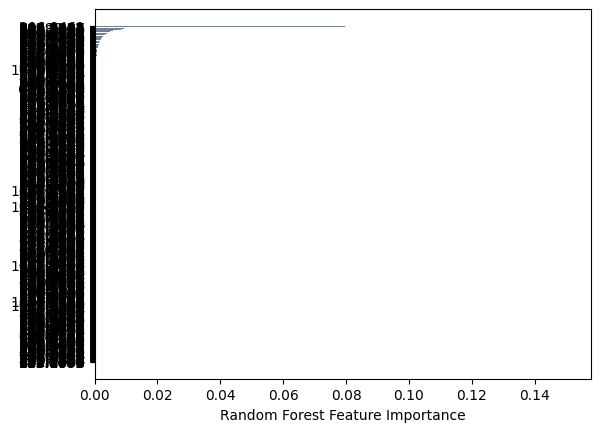

In [ ]:
sorted_idx = rf.feature_importances_.argsort()
#sort col names according to feature importance
plt.barh(col_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [ ]:
df1 = df.sort_values(by='Feature Importance', ascending=False)
df1.to_csv(path+'candidametabolomics_rf-allfeatures-06282023.csv')

In [ ]:
#note - code ran locally/using a server due to computational intensity
#try recursive feature elimination using top model parameters
from sklearn.feature_selection import RFECV
selector = RFECV(rf, step=50, cv=10, scoring='neg_mean_squared_error', n_jobs= -1)
selector = selector.fit(X, y)
mask = selector.get_support(indices=False)
np.savetxt("/content/gdrive/MyDrive/Colab Notebooks/DataFiles/MLProcessedData/metabolomicsRFECV_07023023.txt", mask, delimiter=",")

In [ ]:
import sys
np.set_printoptions(threshold=sys.maxsize)
mask = selector.get_support()
print(mask.shape)

(1472,)


# Skeleton code for feature selection below
Please use below as an example of code you can modify.

In [ ]:
from sklearn.model_selection import train_test_split
#this splits the samples, so that the testing and training are stratifyed based on treatment.
X= metabolomics_data1.iloc[:,3:].to_numpy()
y = metabolomics_data1['Candida Levels'].to_numpy()
group = metabolomics_data1['Treatment'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.14, random_state=42, shuffle =True, stratify=group)

In [ ]:
# automatic nested cross-validation for random forest on regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
#we are going to use random search to identify best features
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)]
# Number of features to consider at every split
#max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 6, 8, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               #'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               }
pprint(random_grid)

In [ ]:
# automatic nested cross-validation for random forest on regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    'min_samples_leaf': [2, 3, 4, 5, 6],
    'min_samples_split': [4, 5, 6, 7, 8, 9, 10, 15, 20],
    'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600]
}

cv_inner = KFold(n_splits=5, shuffle=True, random_state=42)
# define the model
model = RandomForestRegressor(random_state=42)

# define search
search = GridSearchCV(model, param_grid = param_grid, scoring='neg_mean_squared_error', n_jobs=1, cv=cv_inner, refit=True)
# configure the cross-validation procedure
cv_outer = KFold(n_splits=10, shuffle=True, random_state=42)

# execute the nested cross-validation
scores = cross_val_score(search, X, y, scoring= 'neg_mean_squared_error', cv=cv_outer, n_jobs=-1)

# report performance
print('R2: %.3f (%.3f)' % (mean(scores), std(scores)))


# Metabolomics


Step 1: reduce data by removing features that were eliminated by Recursive
elimination algorithms
Step 2: PCA plot - look at clustering pattern - this should be "more" clustered than above
Step 3: Train desired models individually - train and test set for comparison -
training - 80% testing - 20%
cv 80% training
start off with random search - use ranges for important hyperparameters based on reading.
Once this is selected, use range surrounding the "best" selected RS parameter.
MSE and R2 to judge perfomance.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
import pandas as pd
import numpy as np
filepath = '/content/candidametabolomics_rf-allfeatures-06282023.csv'
features = pd.read_csv(filepath)
features.columns = ['Feature Index', 'Feature Importance', 'm/z val']

In [ ]:
features

,Feature Index,Feature Importance,m/z val
0,467,0.150313,206.0461
1,432,0.083576,199.1700
2,585,0.079804,227.2014
3,1382,0.070771,743.2412
4,846,0.054920,295.1547
...,...,...,...
1467,534,0.000006,217.1084
1468,911,0.000006,317.0674
1469,1176,0.000006,443.1098
1470,988,0.000006,345.0603


In [ ]:
#create table that lists the numebr of features for a given set of feature importance cutoffs
from tabulate import tabulate
threshold = []
values_above = []
cutoffs = [.01, .001, .0001, .00001]
for cutoff in cutoffs:
  count = 0
  for item in features.iloc[:,1]:
    if item < cutoff:
      threshold.append(cutoff)
      values_above.append(count)
      break
    count += 1
print(threshold, values_above)
for item in cutoffs:
  cutoffs[cutoffs.index(item)] = '>'+ str(item)
cutoffs.append('No cutoff')
values_above.append(features['Feature Importance'].size)
titles = ['Feature Importance', '# of Features']
data = []
for i in range(len(cutoffs)):
  data.append([cutoffs[i], values_above[i]])
print(tabulate(data, headers=titles))


[0.01, 0.001, 0.0001, 1e-05] [11, 94, 605, 1447]
Feature Importance      # of Features
--------------------  ---------------
>0.01                              11
>0.001                             94
>0.0001                           605
>1e-05                           1447
No cutoff                        1472


In [ ]:
#Create a csv file with all features above selected importance

num_feat = 605

reduced_features = features.iloc[:num_feat, :]
reduced_features.columns = ['Feature Index', 'Feature Importance', 'm/z val']
reduced_features.to_csv('candidametabolomics_rf-reducedfeatures.0001-07032023.csv')
reduced_features


,Feature Index,Feature Importance,m/z val
0,467,0.150313,206.0461
1,432,0.083576,199.1700
2,585,0.079804,227.2014
3,1382,0.070771,743.2412
4,846,0.054920,295.1547
...,...,...,...
600,1080,0.000101,381.1548
601,867,0.000100,302.0251
602,974,0.000100,337.2164
603,240,0.000100,160.0407


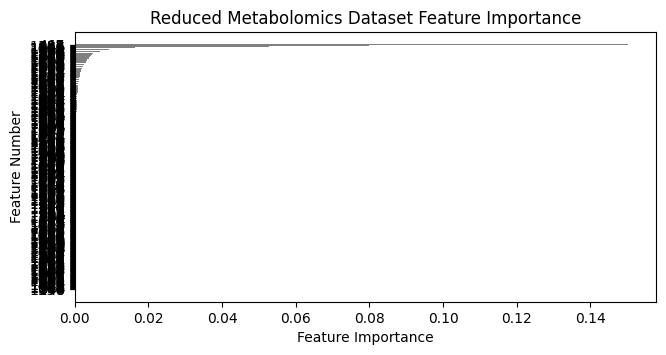

In [ ]:
#feature importance ranking
importance = reduced_features['Feature Importance']
feature = reduced_features['Feature']
barh = plt.barh([str(s) for s in feature], importance, color='gray')
plt.title("Reduced Metabolomics Dataset Feature Importance")
ax = plt.gca()
ax.set_ylabel("Feature Number")
ax.set_xlabel("Feature Importance")
plt.gca().invert_yaxis()

plt.show()

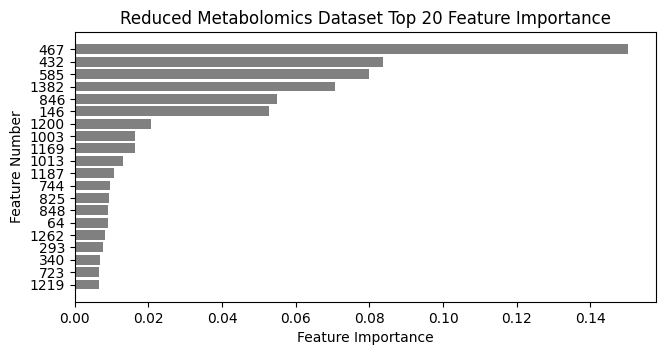

In [ ]:
#top 20 featre importance ranking
top_importance = reduced_features['Feature Importance'][:20]
top_features = reduced_features['Feature'][:20]
barh = plt.barh([str(s) for s in top_features], top_importance, color='gray')
plt.title("Reduced Metabolomics Dataset Top 20 Feature Importance")
ax = plt.gca()
ax.set_ylabel("Feature Number")
ax.set_xlabel("Feature Importance")
plt.gca().invert_yaxis()

plt.show()

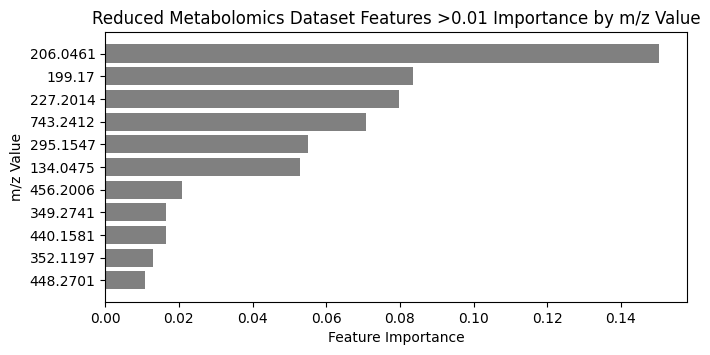

In [ ]:
#m/z values for all features above .01 importance
top_importance = reduced_features['Feature Importance'][:11]
top_features = reduced_features['m/z val'][:11]
barh = plt.barh([str(s) for s in top_features], top_importance, color='gray')
plt.title("Reduced Metabolomics Dataset Features >0.01 Importance by m/z Value")
ax = plt.gca()
ax.set_ylabel("m/z Value")
ax.set_xlabel("Feature Importance")
plt.gca().invert_yaxis()

plt.show()

In [ ]:
import pandas as pd
data = pd.read_csv('/content/metabolomicsdata-07022023.csv')
data

,Unnamed: 0,Sample Number,Treatment,Candida Levels,55.0189,57.0348,59.014,66.0347,69.0347,71.014,...,976.5074,979.5474,995.9009,1000.3734,1008.8013,1023.3639,1024.307,1024.5068,1028.4828,1048.3279
0,0,sample1,Control,4.287802,3.341731,3.880070,4.868103,3.211254,3.929061,3.952841,...,3.449556,3.512818,3.372544,3.296775,3.550351,3.308137,3.264227,3.397853,3.354780,3.171580
1,1,sample2,Control,5.322219,3.420781,3.920958,4.940233,3.137671,3.962061,3.962369,...,3.465532,3.559966,3.425371,3.307496,3.530264,3.331022,3.238172,3.451326,3.359361,3.201534
2,2,sample3,Control,4.113943,3.408833,3.888432,4.915701,3.154576,3.971925,3.879440,...,3.410440,3.469012,3.431122,3.359171,3.560743,3.272306,3.245142,3.455378,3.414054,3.163310
3,3,sample4,Control,5.230449,3.250786,3.921842,4.938059,3.077186,3.938895,3.902275,...,3.420863,3.475163,3.342028,3.377852,3.453089,3.180986,3.234264,3.308778,3.337459,3.154272
4,4,sample5,Control,4.614897,3.254306,3.891342,4.879067,3.151676,3.948462,3.901540,...,3.634679,3.561936,3.368473,3.347037,3.416557,3.478061,3.247114,3.474216,3.418964,3.317018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,100,sample103,Ketogenic Diet,3.569374,3.281828,3.850861,4.886274,3.337160,3.918319,3.853333,...,3.402261,3.466274,3.372636,3.276577,3.500442,3.326745,3.203848,3.349375,3.394189,3.220239
101,101,sample104,Ketogenic Diet,4.575188,3.264582,3.762754,4.748994,3.188507,3.847388,3.851931,...,3.415641,3.512084,3.450480,3.250542,3.410946,3.278411,3.235655,3.393926,3.339650,3.358791
102,102,sample105,Ketogenic Diet,4.788875,3.244525,3.635936,4.735100,3.151829,3.877458,3.711132,...,3.443419,3.551999,3.467978,3.326131,3.435367,3.269630,3.289254,3.390582,3.485082,3.265407
103,103,sample106,Ketogenic Diet,0.000000,3.352279,3.697273,4.736803,3.255031,3.850462,3.849235,...,3.539013,3.569491,3.432969,3.383636,3.428378,3.346059,3.254306,3.508664,3.498655,3.292810


In [ ]:
#Create dataset with only selected features
reduced_data = data


selected = list(reduced_features['Feature'])
drop = []
for i in range(1472):
  if i not in selected:
    drop.append(i+4)
reduced_data.drop(reduced_data.columns[drop], axis=1, inplace=True)

NameError: ignored

In [ ]:
reduced_data.to_csv('reduced605_metabolomicsdata-07112023.csv')

In [ ]:
reduced_data = pd.read_csv('reduced605_metabolomicsdata-07112023.csv')

<ipython-input-9-802a9048dbe3>:22: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for ha in ax.legend_.legendHandles:


Text(0, 0.5, 'PC2 (13.53% Explained Variance)')

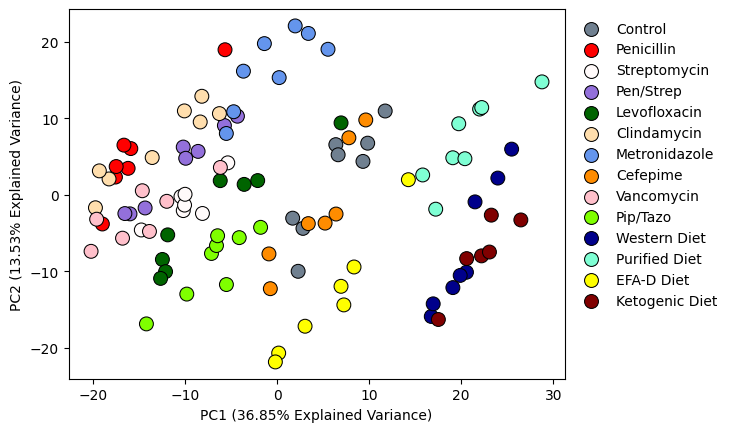

In [ ]:
#pca calculation for data visualization
# Separating out the features
x = reduced_data.iloc[:, 3:].values
# Separating out the target
y = reduced_data.loc[:,['Treatment']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, reduced_data[['Treatment']]], axis = 1)
pca.explained_variance_ratio_
kwargs  =   {'edgecolor':"black", # for edge color
             'linewidth':0.75, # line width of spot
             #'linestyle':'--', # line style of spot
            }
ax=sns.scatterplot(data=finalDf, x="principal component 1", y="principal component 2", hue='Treatment', s=100, **kwargs)
# Place the legend
lgd = ax.legend(frameon=False)
# Modify the point edge colour
for ha in ax.legend_.legendHandles:
    ha.set_edgecolor("black")
    ha.set_linewidth(0.75)
    ha._sizes = [100]

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.xlabel('PC1 (36.85% Explained Variance)')
plt.ylabel('PC2 (13.53% Explained Variance)')

In [ ]:
#Create data arrays
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

X = np.array(reduced_data.iloc[:, 5:])
y = np.array(reduced_data['Candida Levels'])
print(y)
# label_encoder = LabelEncoder().fit(y)
# encoded_y = label_encoder.transform(y)

# print(encoded_y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

print(X_train.shape, y_train.shape)

NameError: ignored

In [ ]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,596,597,598,599,600,601,602,603,604,605
0,3.897077,3.081167,3.876939,4.003288,3.698318,3.560385,3.392081,3.781863,3.664031,3.640084,...,3.329398,3.349180,3.477194,3.527114,3.802363,3.653984,3.610926,3.389166,3.429833,3.392081
1,4.463893,3.115444,3.870930,3.781289,3.426918,3.136879,3.122216,3.650259,3.609381,3.322633,...,3.443185,3.524201,3.302223,3.264227,3.750971,3.693067,3.778296,3.482588,3.382287,3.392081
2,4.787460,3.174786,3.876680,4.060509,3.825815,3.365675,3.253822,3.862012,3.807129,3.583142,...,3.633923,3.396287,3.548389,3.569783,3.847233,3.766190,3.679382,3.591510,3.480007,3.568495
3,3.029384,3.229426,3.969649,3.929138,3.765557,3.331731,3.628797,3.749156,3.767861,3.634024,...,3.517921,3.270795,3.257198,3.336860,3.751702,3.780353,3.945542,3.493388,3.415641,3.360025
4,4.610660,3.110590,3.993635,4.046281,3.736596,3.452093,3.167908,3.771293,3.690285,3.595165,...,3.465903,3.394189,3.506640,3.492062,3.758836,3.658107,3.575650,3.426836,3.347525,3.400711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,0.000000,3.258038,3.918371,3.961943,3.664548,3.228400,3.222976,3.734240,3.787638,3.571126,...,3.294246,3.249076,3.079904,3.176381,3.735359,3.617996,3.625312,3.366890,3.311542,3.256597
80,0.000000,3.255031,3.850462,3.849235,3.440594,3.304706,3.223755,3.719911,3.576744,3.413970,...,3.545121,3.410862,3.376668,3.344981,3.773201,3.717213,3.720283,3.596267,3.432969,3.428378
81,5.835691,3.201261,4.030701,4.030984,3.708846,3.391553,3.209783,3.795532,3.777173,3.588776,...,3.506708,3.378670,3.390759,3.256357,3.806417,3.758571,3.694078,3.494711,3.332640,3.426918
82,5.004321,3.177103,4.082857,4.065393,3.912381,3.341929,3.366330,3.938094,3.875264,3.649530,...,3.533963,3.332842,3.427405,3.473049,3.768934,3.709736,3.598243,3.584840,3.362105,3.411283


In [ ]:
# params = {
#  'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
#  'max_depth' : [ 3, 4, 5, 6, 8, 10, 12, 15],
#  'min_child_weight' : [ 1, 3, 5, 7 ],
#  'gamma': [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
#  'colsample_bytree' : [ 0.3, 0.4, 0.5 , 0.7 ]
# }


params = {
  'max_depth': [3, 5, 6, 10, 15, 20],
  'learning_rate': [0.01, 0.1, 0.2, 0.3],
  'subsample': np.arange(0.5, 1.0, 0.1),
  'colsample_bytree': np.arange(0.4, 1.0, 0.1),
  'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
  'n_estimators': [100, 500, 1000]}
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

model = XGBRegressor()
model_random = RandomizedSearchCV(model, param_distributions=params, n_iter = 1000, cv=10, verbose=2, random_state=4, n_jobs=-1)
model_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          predictor=None, random_state=None, ...),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'colsample_bylevel': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 6, 10, 15, 20],
                                        'n_estimators': [100, 500, 1000],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   random_state=4, verbose=2)

In [ ]:
model_random.best_params_

{'subsample': 0.8999999999999999,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.7999999999999999}

{'subsample': 0.8999999999999999,
 'n_estimators': 500,
 'max_depth': 3,
 'learning_rate': 0.1,
 'colsample_bytree': 0.7999999999999999,
 'colsample_bylevel': 0.7999999999999999}

In [ ]:
#Create data arrays
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

reduced_data = pd.read_csv('/content/reduced605_metabolomicsdata-07112023.csv')
X = np.array(reduced_data.iloc[:, 4:])
y = np.array(reduced_data['Candida Levels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)

xgb_params = {
  'max_depth': [3, 5, 6, 10, 15, 20],
  'learning_rate': [0.01, 0.1, 0.2, 0.3],
  'subsample': np.arange(0.5, 1.0, 0.1),
  'colsample_bytree': np.arange(0.4, 1.0, 0.1),
  'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
  'n_estimators': [100, 500, 1000]}
#https://towardsdatascience.com/xgboost-fine-tune-and-optimize-your-model-23d996fab663

xgb = XGBRegressor(random_state=4)
xgb_random = RandomizedSearchCV(xgb, param_distributions=xgb_params, n_iter = 1000, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], verbose=2, random_state=4, n_jobs=-1,refit=False)
xgb_random.fit(X_train, y_train)

xgb_df = pd.DataFrame(xgb_random.cv_results_)
xgb_df.to_csv('xgboost_reduced605_metabolomics-071123.csv')


en_params = {
'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100],
'l1_ratio': np.arange(0, 1, 0.01)
}
#https://machinelearningmastery.com/elastic-net-regression-in-python/


en = ElasticNet(random_state=4)
en_random = RandomizedSearchCV(en, param_distributions=en_params, n_iter = 1000, cv=10,
                               scoring=['r2','neg_root_mean_squared_error'], verbose=2, random_state=4, n_jobs=-1,refit=False)
en_random.fit(X_train, y_train)

en_df = pd.DataFrame(en_random.cv_results_)
en_df.to_csv('elasticnet_reduced605_metabolomics-071123.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 900 is smaller than n_iter=1000. Running 900 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 900 candidates, totalling 9000 fits


KeyboardInterrupt: ignored

In [ ]:
pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

  Cloning https://github.com/JakeColtman/bartpy.git to /tmp/pip-req-build-j6j7s65m
  Running command git clone --filter=blob:none --quiet https://github.com/JakeColtman/bartpy.git /tmp/pip-req-build-j6j7s65m
  Resolved https://github.com/JakeColtman/bartpy.git to commit 09e409e91dd1b9d44784c788c2d731dafb181eb0
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for bartpy: filename=bartpy-0.0.2-py3-none-any.whl size=52915 sha256=0f20aafb6c50ec4473c14d69c7d6b5210b1fca5b6a36f36d4f9c3835be0c8b3c
  Stored in directory: /tmp/pip-ephem-wheel-cache-2ktm0jod/wheels/b6/71/21/dd087c072a891602411b04a91c13cb5cb72550e4cbc0eb70c6
  Created wheel for sklearn: filename=sklearn-0.0.post7-py3-none-any.whl size=2950 sha256=2879f3e89b9bcbfe10b4a6a9c8c8533d2399932ceb44077d9124c720b58f00b5
  Stored in directory: /root/.cache/pip/wheels/c8/9c/85/72901eb50bc4bc6e3b2629378d172384ea3dfd19759c77fd2c
Successfully built bartpy sklearn


In [ ]:
# pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

# pip install xgboost

# pip install pandas

# pip install numpy

# pip install scikit-learn

import pandas as pd
import numpy as np
import datetime

from xgboost import XGBRegressor
from bartpy.sklearnmodel import SklearnModel as SKModel_BART
from sklearn.linear_model import Lasso as LassoRegression
from sklearn.linear_model import Ridge as RidgeRegression
from sklearn.svm import SVR as SVRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

def data_prep(path_to_csv):
  #assumes csv is in the same format as 'reduced605_metabolomicsdata-07112023.csv'
  reduced_data = pd.read_csv(path_to_csv)
  X = np.array(reduced_data.iloc[:, 5:])
  y = np.array(reduced_data['Candida Levels'])
  return train_test_split(X, y, test_size=.2, shuffle=True)

def linear_regression(X, y, datasetname):
  #linear regression
  lin = LinearRegression()
  lin_cv = cross_validate(lin, X, y, scoring=['r2', 'neg_root_mean_squared_error'], n_jobs=-1, cv=10, return_train_score=True)

  lin_df = pd.DataFrame(lin_cv)
  lin_df.to_csv('lin_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def EN(X, y, params, datasetname):
  #Elastic Net
  en = ElasticNet()
  en_random = RandomizedSearchCV(en, param_distributions=params, n_iter = 1000, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], verbose=2, random_state=4, n_jobs=-1,refit=False)
  en_random.fit(X, y)

  en_df = pd.DataFrame(en_random.cv_results_)
  en_df.to_csv('en_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def XGBoost(X, y, params, datasetname):
  #XGBoost
  xgb = XGBRegressor(random_state=4)
  xgb_random = RandomizedSearchCV(xgb, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], verbose=2, random_state=4, n_jobs=-1,refit=False)
  xgb_random.fit(X, y)

  xgb_df = pd.DataFrame(xgb_random.cv_results_)
  xgb_df.to_csv('xgb_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def Lasso(X, y,params, datasetname):
  #Lasso regression
  lasso = LassoRegression()
  lasso_random = RandomizedSearchCV(lasso, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
  lasso_random.fit(X, y)

  lasso_df = pd.DataFrame(lasso_random.cv_results_)
  lasso_df.to_csv('lasso_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def Ridge(X, y, params, datasetname):
  #Ridge Regression
  ridge = RidgeRegression()
  ridge_random = RandomizedSearchCV(ridge, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
  ridge_random.fit(X, y)

  ridge_df = pd.DataFrame(ridge_random.cv_results_)
  ridge_df.to_csv('ridge_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def SGD(X, y, params, datasetname):
  #Linear Stochastic Gradient Descent Regression
  sgd = SGDRegressor()
  sgd_random = RandomizedSearchCV(sgd, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
  sgd_random.fit(X, y)

  sgd_df = pd.DataFrame(sgd_random.cv_results_)
  sgd_df.to_csv('sgd_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def BART(X, y,params, datasetname):
  #Bayesian Additive Regression Tree
  bart = SKModel_BART()
  bart_random = RandomizedSearchCV(bart, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
  bart_random.fit(X, y)


  bart_df = pd.DataFrame(bart_random.cv_results_)
  bart_df.to_csv('bart_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def SVR(X, y, params, datasetname):
  #Support Vector Regression
  svr = SVRegressor()
  svr_random = RandomizedSearchCV(svr, param_distributions=params, n_iter = 1000, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
  svr_random.fit(X, y)

  svr_df = pd.DataFrame(svr_random.cv_results_)
  svr_df.to_csv('svr_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def RunModels(X, y, datasetname):

  linear_regression(X, y, datasetname)

  xgb_params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]}
  XGBoost(X, y, xgb_params, datasetname)

  en_params = {
  'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100],
  'l1_ratio': np.arange(0, 1, 0.01)
  }
  EN(X, y, en_params, datasetname)

  lasso_params = {
      'alpha':[1e-5,1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
      'max_iter':np.arange(100, 1000, 10)
  }
  Lasso(X, y, lasso_params, datasetname)

  ridge_params = {
      'alpha':[1e-5,1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
      'max_iter':np.arange(100, 1000, 10)
  }
  Ridge(X, y, ridge_params, datasetname)

  sgd_params = {
      'alpha':[1e-10,1e-5,1e-3,.01, .1, 1],
      'max_iter':np.arange(100,1000,10),
      'learning_rate': ['optimal','invscaling', 'adaptive'],
      'eta0':[1e-5, 1e-3, .01, .1],
      'n_iter_no_change': [2, 5, 10]
  }
  SGD(X, y, sgd_params, datasetname)

  svr_params = {
      'gamma' : [1e-4, 1e-3, .01, .1, 1, 1, 100],
      'C': [.01,.1,1,10,100],
      'epsilon': np.arange(.1, 1, .1),
      'max_iter': np.arange(100,1000,10)
  }
  SVR(X, y, svr_params, datasetname)

  bart_params = {
      'n_trees' : np.arange(50,200,10),       #suggested is 50 to 200
      'alpha' : np.arange(.5, .95, .05),      #default is .95
      'beta' : np.arange(1, 10, 1)            #default is 2
  }
  BART(X, y, bart_params, datasetname)



#prep data and run models
X_train, X_test, y_train, y_test = data_prep(path_to_csv = '/content/reduced605_metabolomicsdata-07112023.csv')
RunModels(X_train, y_train, datasetname = 'reduced605metabolomics')


KeyboardInterrupt: ignored

In [ ]:
import datetime
print(str(datetime.datetime.now().date()))


2023-07-19


In [ ]:
#rerunning lasso and ridge w/out lowest alpha values
import pandas as pd
import numpy as np

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

reduced_data = pd.read_csv('reduced605_metabolomicsdata-07112023.csv')
X = np.array(reduced_data.iloc[:, 5:])
y = np.array(reduced_data['Candida Levels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)
ridge_params = {
    'alpha':[1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
    'max_iter':np.arange(100, 1000, 10)
}

ridge = Ridge()
ridge_random = RandomizedSearchCV(ridge, param_distributions=ridge_params, n_iter = 1000, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], random_state=4, verbose=2, n_jobs=-1,refit=False)
ridge_random.fit(X_train, y_train)

ridge_df = pd.DataFrame(ridge_random.cv_results_)
ridge_df.to_csv('ridgeV2_reduced605_metabolomics_071623.csv')


lasso_params = {
    'alpha':[1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
    'max_iter':np.arange(100, 1000, 10)
}

lasso = Lasso()
lasso_random = RandomizedSearchCV(lasso, param_distributions=lasso_params, n_iter = 1000, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], random_state=4, n_jobs=-1,refit=False)
lasso_random.fit(X_train, y_train)

lasso_df = pd.DataFrame(lasso_random.cv_results_)
lasso_df.to_csv('lassoV2_reduced605_metabolomics-071623.csv')

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


In [ ]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate

def get_best_params(metric, df):
  params = []
  means = []
  stds = []
  try:
    first_indeces = df.index[df['rank_test_'+metric]==1]
    for index in first_indeces:
      params.append(df['params'][index])
      means.append(df['mean_test_'+metric][index])
      stds.append(df['std_test_'+metric][index])
  except KeyError:
    return 'N/A'
  return params, means, stds

for item in os.listdir('/content'):
  if len(item.split('.')) > 1:
    if item.split('.')[1] == 'csv':
      df = pd.read_csv(item)
      print('\n\n\n', item.split('_')[0])
      print('\nr2', get_best_params('r2', df)[0])
      print(len(get_best_params('r2', df)[0]))
      print('\nmean r2', get_best_params('r2', df)[1])
      print('std r2', get_best_params('r2', df)[2])
      print('\nRMSE', get_best_params('neg_root_mean_squared_error', df)[0])
      print('\nmean RMSE', get_best_params('neg_root_mean_squared_error', df)[1])
      print('std RMSE', get_best_params('neg_root_mean_squared_error', df)[2])








 candidametabolomics

r2 N
1

mean r2 /
std r2 A

RMSE N

mean RMSE /
std RMSE A


In [ ]:
pip install --upgrade setuptools


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 804.0/804.0 kB 6.2 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


In [ ]:
pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 24.2 MB/s eta 0:00:00


In [ ]:
pip install sklearn


In [ ]:
pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

  Cloning https://github.com/JakeColtman/bartpy.git to /tmp/pip-req-build-i16_j23i
  Running command git clone --filter=blob:none --quiet https://github.com/JakeColtman/bartpy.git /tmp/pip-req-build-i16_j23i
  Resolved https://github.com/JakeColtman/bartpy.git to commit 09e409e91dd1b9d44784c788c2d731dafb181eb0
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post7-py3-none-any.whl
  Created wheel for bartpy: filename=bartpy-0.0.2-py3-none-any.whl size=52915 sha256=06d1ba607c766452ac0bde0fda7a43af1884df74d30ae1c32d3a401e2d8397ff
  Stored in directory: /tmp/pip-ephem-wheel-cache-xmdoc0tz/wheels/b6/71/21/dd087c072a891602411b04a91c13cb5cb72550e4cbc0eb70c6
Successfully built bartpy


In [ ]:
pip install xgboost

In [ ]:
#Grid Search


# pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

# pip install xgboost

# pip install pandas

# pip install numpy

# pip install sklearn

import pandas as pd
import numpy as np

from xgboost import XGBRegressor
from bartpy.sklearnmodel import SklearnModel as BART
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

reduced_data = pd.read_csv('reduced605_metabolomicsdata-07112023.csv')
X = np.array(reduced_data.iloc[:, 5:])
y = np.array(reduced_data['Candida Levels'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, shuffle=True)


#linear regression
lin = LinearRegression()
lin_cv = cross_validate(lin, X_train, y_train, scoring=['r2', 'neg_root_mean_squared_error'], n_jobs=-1, cv=10, return_train_score=True)

lin_df = pd.DataFrame(lin_cv)
lin_df.to_csv('lin_grid_reduced605_metabolomics-071723.csv')


#Elastic Net
en_params = {
'alpha': np.linspace(1e-6, 1e-5, 20), # 1e-5
'l1_ratio': np.arange(0, .3, 0.01) # r2:0.27, MSE:.06
}

en = ElasticNet(random_state=4)
en_grid= GridSearchCV(en, param_grid=en_params, cv=10,
                               scoring=['r2','neg_root_mean_squared_error'], verbose=2, n_jobs=-1,refit=False)
en_grid.fit(X_train, y_train)

en_df = pd.DataFrame(en_grid.cv_results_)
en_df.to_csv('elasticnet_grid_reduced605_metabolomics-071723.csv')


#XGBoost
xgb_params = {
  'max_depth': [4,5,6,7],   #5
  'learning_rate': [.001, .005, .01, .05], #0.01
  'subsample': [.7, .8, .9],   #0.8
  'colsample_bytree': [.8,.9,1], #.9
  'colsample_bylevel': [.8,.9,1], #.9
  'n_estimators': [1000, 2500, 5000]}   #1000

xgb = XGBRegressor(random_state=4)
xgb_grid = GridSearchCV(xgb, param_grid=xgb_params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], verbose=2, n_jobs=-1,refit=False)
xgb_grid.fit(X_train, y_train)

xgb_df = pd.DataFrame(xgb_grid.cv_results_)
xgb_df.to_csv('xgboost_grid_reduced605_metabolomics-071723.csv')


#Lasso regression
lasso_params = {
    'alpha':np.linspace(1e-5,1e-2, 500) #1e-3
    #'max_iter':np.arange(100, 1000, 10)
}

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid=lasso_params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'],  n_jobs=-1,refit=False)
lasso_grid.fit(X_train, y_train)

lasso_df = pd.DataFrame(lasso_grid.cv_results_)
lasso_df.to_csv('lasso_grid_reduced605_metabolomics-071723.csv')


#Ridge Regression
ridge_params = {
    'alpha':np.linspace(1e-5,1e-2, 500) #1e-3
    #'max_iter':np.arange(100, 1000, 10)
}

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid=ridge_params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'],  n_jobs=-1,refit=False)
ridge_grid.fit(X_train, y_train)

ridge_df = pd.DataFrame(ridge_grid.cv_results_)
ridge_df.to_csv('ridge_grid_reduced605_metabolomics-071723.csv')

#Linear Stochastic Gradient Descent Regression
sgd_params = {
    'alpha': np.arange(.01, .1, .01),   #.01
    'max_iter':np.arange(500,700,50), #690
    'learning_rate': ['adaptive'], #adaptive
    'eta0':[1e-6, 2e-6, 5e-5, 1e-5,2e-5,5e-5, 1e-4, 2e-4, 5e-4], #1e-5
    'n_iter_no_change': np.arange(8,20,2)  #10
}

sgd = SGD()
sgd_grid = GridSearchCV(sgd, param_grid=sgd_params,  cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
sgd_grid.fit(X_train, y_train)

sgd_df = pd.DataFrame(sgd_grid.cv_results_)
sgd_df.to_csv('sgd__grid_reduced605_metabolomics-071723.csv')

#Bayesian Additive Regression Tree
bart_params = {
    'n_trees' : np.arange(160,200,5),       #180
    'alpha' : np.arange(.7, .95, .01),      #7
    'beta' : [2,3,4,5,6]                    #4
}

bart = BART()
bart_grid = GridSearchCV(bart, param_grid=bart_params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'],  verbose=2, n_jobs=-1,refit=False)
bart_grid.fit(X_train, y_train)


bart_df = pd.DataFrame(bart_grid.cv_results_)
bart_df.to_csv('bart_grid_reduced605_metabolomics-071723.csv')

#Support Vector Regression
svr_params = {
    'gamma' : [1e-4, 5e-3, 1e-3, 5e-3, .01], #1e-3
    'C': [.01,.1,1,10,100], #100
    'epsilon': np.arange(.01, .2, .01) #.1
    #'max_iter': np.arange(100,1000,10)
}

svr = SVR()
svr_grid = GridSearchCV(svr, param_grid=svr_params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,verbose=2,refit=False)
svr_grid.fit(X_train, y_train)

svr_df = pd.DataFrame(svr_grid.cv_results_)
svr_df.to_csv('svr_grid_reduced605_metabolomics-071723.csv')


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


KeyboardInterrupt: ignored

In [ ]:
!unzip /content/metabolomics_finalresults_gridsearch.zip -d metabolomics_gridsearch_results

Archive:  /content/metabolomics_finalresults_gridsearch.zip
   creating: metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/
  inflating: metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/sgd__grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridsearch_results/__MACOSX/metabolomics_finalresults_gridsearch/._sgd__grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/elasticnet_grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridsearch_results/__MACOSX/metabolomics_finalresults_gridsearch/._elasticnet_grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/xgboost_grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridsearch_results/__MACOSX/metabolomics_finalresults_gridsearch/._xgboost_grid_reduced605_metabolomics-071723.csv  
  inflating: metabolomics_gridse

In [ ]:
#Display Grid Seaarch Results & generate training r2 and RMSE graphs
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import math
import os

from xgboost import XGBRegressor
from bartpy.sklearnmodel import SklearnModel as BART
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.linear_model import ElasticNet


def get_best_params(metric, df):
  params = []
  means = []
  stds = []
  try:
    first_indeces = df.index[df['rank_test_'+metric]==1]
    for index in first_indeces:
      params.append(df['params'][index])
      means.append(df['mean_test_'+metric][index])
      stds.append(df['std_test_'+metric][index])
  except KeyError:
    return 'N/A'
  return params, means, stds



colors = ['#708090', '#FF0000', '#9370DB',
          '#006400', '#FFDEAD', '#6495ED', '#FF8C00',
          '#FFC0CB', '#7FFF00', '#00008B', '#7FFFD4',
          '#FFFF00', '#800000']

model = []
mean_r2 = []
mean_rmse = []
std_r2 = []
std_rmse = []
for item in os.listdir('/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch'):
  if len(item.split('.')) > 1:
    if item.split('.')[1] == 'csv':
      df = pd.read_csv('/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/'+item)
      if item.split('_')[0] != 'lin':
        model.append(item.split('_')[0])
        print(item.split('_')[0])
        print('\nr2', get_best_params('r2', df)[0])
        mean_r2.append(get_best_params('r2', df)[1][0])

        std_r2.append(get_best_params('r2', df)[2][0])
        print('\nRMSE', get_best_params('neg_root_mean_squared_error', df)[0])
        mean_rmse.append(get_best_params('neg_root_mean_squared_error', df)[1][0])
        std_rmse.append(get_best_params('neg_root_mean_squared_error', df)[2][0])
      else:
        model.append('linear')
        mean_r2.append(np.mean(df['test_r2']))
        mean_rmse.append(np.mean(df['test_neg_root_mean_squared_error']))
        std_r2.append(np.std(df['test_r2']))
        std_rmse.append(np.std(df['test_neg_root_mean_squared_error']))

std_r2 = np.array(std_r2)* (2/math.sqrt(10))
std_rmse = np.array(std_rmse)* (2/math.sqrt(10))


ridge

r2 ["{'alpha': 5.0}"]

RMSE ["{'alpha': 5.0}"]
xgboost

r2 ["{'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}"]

RMSE ["{'colsample_bylevel': 0.4, 'colsample_bytree': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 500, 'subsample': 0.7}"]
svr

r2 ["{'C': 5, 'epsilon': 0.6, 'gamma': 0.01}"]

RMSE ["{'C': 10, 'epsilon': 0.4, 'gamma': 0.01}"]
lasso

r2 ["{'alpha': 0.05, 'max_iter': 50}"]

RMSE ["{'alpha': 0.05, 'max_iter': 50}"]
sgd

r2 ["{'alpha': 0.0001, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 950, 'n_iter_no_change': 18}"]

RMSE ["{'alpha': 0.005, 'eta0': 0.0001, 'learning_rate': 'adaptive', 'max_iter': 1000, 'n_iter_no_change': 18}"]
elasticnet

r2 ["{'alpha': 0.05, 'l1_ratio': 0}"]

RMSE ["{'alpha': 0.05, 'l1_ratio': 0}"]


[0.22201191 0.15499393 0.18049107 0.28294757 0.23590815 0.37786948
 0.22653598]


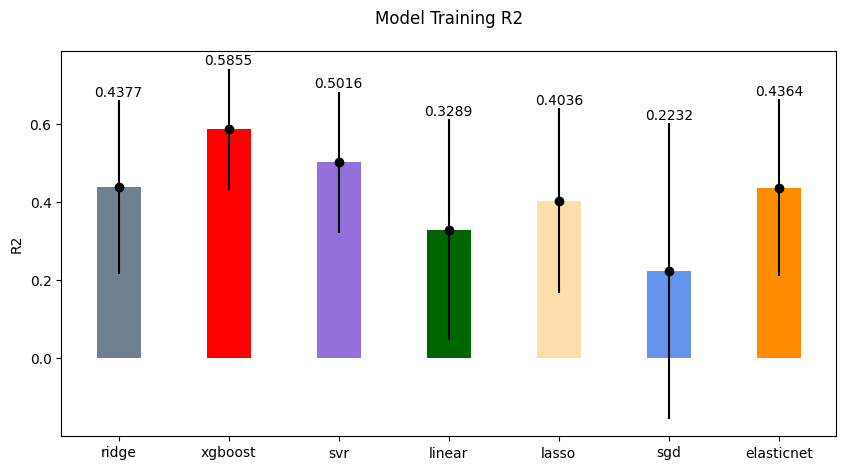

In [ ]:
#Display Grid Seaarch Results & generate training r2 and RMSE graphs



colors = ['#708090', '#FF0000', '#9370DB',
          '#006400', '#FFDEAD', '#6495ED', '#FF8C00',
          '#FFC0CB', '#7FFF00', '#00008B', '#7FFFD4',
          '#FFFF00', '#800000']


print(std_r2)
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar = plt.bar(model, mean_r2, color =colors,
        width = 0.4)
plt.errorbar(model, mean_r2, yerr=std_r2, fmt="o", color='black')

# Add numbers in plot
for i, rectangle in enumerate(bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+std_r2[i] + 0.01,
        '%.4f' % mean_r2[i],
        ha='center')
plt.ylabel("R2")
plt.title("Model Training R2", pad = 20)
plt.show()

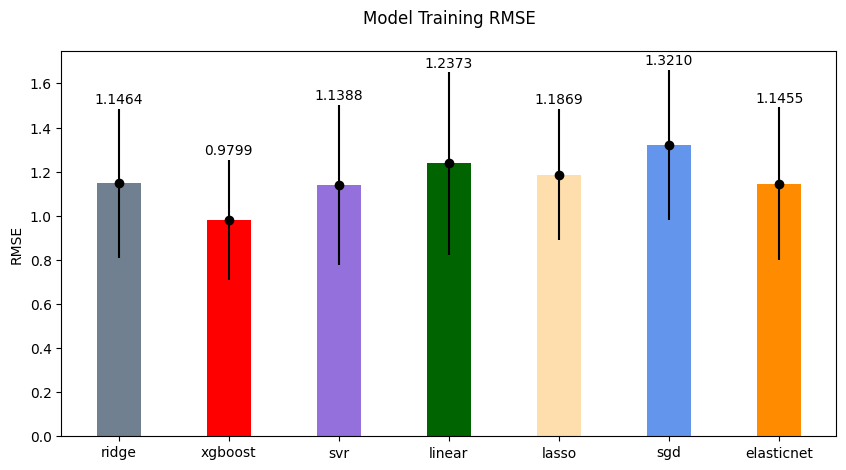

In [ ]:
#Training RMSE
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar = plt.bar(model, -1*np.array(mean_rmse), color =colors,
        width = 0.4)
plt.errorbar(model, -1*np.array(mean_rmse), yerr=std_rmse, fmt="o", color='black')

# Add numbers in plot
for i, rectangle in enumerate(bar):
    height = rectangle.get_height()
    plt.text(rectangle.get_x() + rectangle.get_width()/2, height+std_rmse[i] + 0.01,
        '%.4f' % (-1*np.array(mean_rmse))[i],
        ha='center', va='bottom')
plt.ylabel("RMSE")
plt.title("Model Training RMSE", pad = 20)
plt.show()

In [ ]:
#automatically refiiting and testing the models

# pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

# pip install xgboost

# pip install pandas

# pip install numpy

# pip install sklearn


import pandas as pd
import numpy as np
import json

from xgboost import XGBRegressor
from bartpy.sklearnmodel import SklearnModel as BART
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

def prep_data(dir):
  reduced_data = pd.read_csv(dir)

  X = np.array(reduced_data.iloc[:, 5:])
  y = np.array(reduced_data['Candida Levels'])
  mz = list(reduced_data.columns[5:])

  return train_test_split(X, y, test_size=.2, shuffle=True), mz

def get_best_params(metric, df):
  params = []
  means = []
  stds = []
  try:
    first_indeces = df.index[df['rank_test_'+metric]==1]
    for index in first_indeces:
      params.append(df['params'][index])
      means.append(df['mean_test_'+metric][index])
      stds.append(df['std_test_'+metric][index])
  except KeyError:
    return 'N/A'
  return params, means, stds

def refit_model(model, filepath):
  ret=[]
  df = pd.read_csv(filepath)
  best_r2 = json.loads(get_best_params('r2', df)[0][0].replace("\'", "\""))
  best_rmse = json.loads(get_best_params('neg_root_mean_squared_error', df)[0][0].replace("\'", "\""))
  if best_r2 != best_rmse:
    model_r2 = clone(model)
    model_r2.set_params(**best_r2)
    model_r2.fit(X_train, y_train)
    ret.append(model_r2)

    model_rmse = clone(model)
    model_rmse.set_params(**best_rmse)
    model_rmse.fit(X_train, y_train)
    ret.append(model_rmse)
  else:
    model.set_params(**best_r2)
    model.fit(X_train, y_train)
    ret.append(model)
  return ret

def save_coefficients(model, name, model_type, mz_vals):
  if model_type == 'regressor':
    try:
      coefficients = pd.concat([pd.DataFrame(pd.DataFrame(X_train).columns),pd.DataFrame(mz_vals), pd.DataFrame(np.transpose(model.coef_))], axis = 1)
      coefficients.columns = ['Feature Index', 'm/z values', 'Feature Coefficient']
      coefficients.to_csv(name+'_coefficients.csv')
    except Exception as e:
      print(name+': coefficient saving failed: \n', e, '\n')
  else:
    try:
      coefficients = pd.DataFrame({'Feature Index':list(pd.DataFrame(X_train).columns),'m/z values':mz_vals, 'Feature Importance':list(model.get_booster().get_score(importance_type='weight').values())})
      coefficients.to_csv(name+'_coefficients.csv')
    except Exception as e:
      print(name+': coefficient saving failed: \n', e, '\n')

def evaluate_model(model_list, name, test_df, train_df, model_type):
  if len(model_list) == 1:
    model = model_list[0]
    save_coefficients(model, name, model_type, mz)

    test_r2 = r2_score(y_test, model.predict(X_test))
    test_rmse = mean_squared_error(y_test, model.predict(X_test), squared=False)
    test_df.loc[len(test_df.index)] = [name, test_r2, test_rmse]

    train_r2 = r2_score(y_train, model.predict(X_train))
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    train_df.loc[len(train_df.index)] = [name, train_r2, train_rmse]

  else:
    #model that performs best on r2 metric
    model_r2 = model_list[0]
    save_coefficients(model_r2, name+'_r2', model_type, mz)

    test_r2_0 = r2_score(y_test, model_r2.predict(X_test))
    test_rmse_0 = mean_squared_error(y_test, model_r2.predict(X_test), squared=False)
    test_df.loc[len(test_df.index)] = [name+'_r2', test_r2_0, test_rmse_0]

    train_r2_0 = r2_score(y_train, model_r2.predict(X_train))
    train_rmse_0 = mean_squared_error(y_train, model_r2.predict(X_train), squared=False)
    train_df.loc[len(train_df.index)] = [name, train_r2_0, train_rmse_0]

    #model that performs best on rmse metric
    model_rmse = model_list[1]
    save_coefficients(model_rmse, name+'_rmse', model_type, mz)

    test_r2_1 = r2_score(y_test, model_rmse.predict(X_test))
    test_rmse_1 = mean_squared_error(y_test, model_rmse.predict(X_test), squared=False)
    test_df.loc[len(test_df.index)] = [name+'_rmse', test_r2_1, test_rmse_1]

    train_r2_1 = r2_score(y_train, model_rmse.predict(X_train))
    train_rmse_1 = mean_squared_error(y_train, model_rmse.predict(X_train), squared=False)
    train_df.loc[len(train_df.index)] = [name, train_r2_1, train_rmse_1]

np.random.seed(42)

X_train, X_test, y_train, y_test = prep_data('reduced605_metabolomicsdata-07112023.csv')[0]
mz = prep_data('reduced605_metabolomicsdata-07112023.csv')[1]

test_results = pd.DataFrame(columns=['model', 'r2', 'rmse'])
training_results = pd.DataFrame(columns=['model','r2','rmse'])
#linear regression
test_lin = LinearRegression()
test_lin.fit(X_train, y_train)
evaluate_model([test_lin], 'Linear Regression', test_results, training_results, 'regressor')

#ElasticNet
test_en = ElasticNet()
en_model_list = refit_model(test_en, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/elasticnet_grid_reduced605_metabolomics-071723.csv')
evaluate_model(en_model_list, 'ElasticNet', test_results, training_results,  'regressor')

#Lasso
test_lasso = Lasso()
lasso_model_list = refit_model(test_lasso, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/lasso_grid_reduced605_metabolomics-071723.csv')
evaluate_model(lasso_model_list, 'Lasso', test_results, training_results, 'regressor')

#Ridge
test_ridge = Ridge()
ridge_model_list = refit_model(test_ridge, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/ridge_grid_reduced605_metabolomics-071723.csv')
evaluate_model(ridge_model_list, 'Ridge', test_results,training_results,  'regressor')

#SGD
test_sgd = SGD()
sgd_model_list = refit_model(test_sgd, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/sgd__grid_reduced605_metabolomics-071723.csv')
evaluate_model(sgd_model_list, 'SGD', test_results, training_results, 'regressor')

#SVR
test_svr = SVR()
svr_model_list = refit_model(test_svr, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/svr_grid_reduced605_metabolomics-071723.csv')
evaluate_model(svr_model_list, 'SVR', test_results,training_results,  'regressor')

#XGBoost
test_xgb = XGBRegressor()
xgb_model_list = refit_model(test_xgb, '/content/metabolomics_gridsearch_results/metabolomics_finalresults_gridsearch/xgboost_grid_reduced605_metabolomics-071723.csv')
evaluate_model(xgb_model_list, 'XGBoost', test_results, training_results, 'tree')

# #BART
# test_bart = BART()
# bart_model_list = refit_model(test_bart, '/content/metabolomics_gridsearch_results/bart_grid_reduced605_metabolomics-071723.csv')
# evaluate_model(bart_model_list, 'BART', test_results)

# test_results.to_csv('metabolomics_allmodels_testresults.csv')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.974e+01, tolerance: 3.366e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.030e-01, tolerance: 3.366e-02
  model = cd_fast.enet_coordinate_descent(


SVR_r2: coefficient saving failed: 
 coef_ is only available when using a linear kernel 

SVR_rmse: coefficient saving failed: 
 coef_ is only available when using a linear kernel 

XGBoost_r2: coefficient saving failed: 
 All arrays must be of the same length 

XGBoost_rmse: coefficient saving failed: 
 All arrays must be of the same length 



In [ ]:
#BART
test_bart = BART()
bart_model_list = refit_model(test_bart, '/content/metabolomics_gridsearch_results/bart_grid_reduced605_metabolomics-071723.csv')
evaluate_model(bart_model_list, 'BART', test_results)

test_results.to_csv('metabolomics_allmodels_testresults.csv')


In [ ]:
test_results

,model,r2,rmse
0,Linear Regression,0.847027,0.789611
1,ElasticNet,0.816390,0.865075
2,Lasso,0.775395,0.956787
3,Ridge,0.810964,0.877765
4,SGD_r2,0.621647,1.241808
5,SGD_rmse,0.616261,1.250615
6,SVR_r2,0.770894,0.966326
7,SVR_rmse,0.803202,0.895604
8,XGBoost_r2,0.846555,0.790827
9,XGBoost_rmse,0.821796,0.852244


In [ ]:
test_results.to_csv('metabolomics_nobart_testresults.csv')
test_results.drop(index=[5, 6, 8], inplace=True)
test_results['model'] = test_results['model'].replace('SGD_r2','SGD')
test_results['model'] = test_results['model'].replace('SVR_rmse','SVR')
test_results['model'] = test_results['model'].replace('XGBoost_rmse','XGBoost')

In [ ]:
test_results

,model,r2,rmse
0,Linear Regression,0.847027,0.789611
1,ElasticNet,0.816390,0.865075
2,Lasso,0.775395,0.956787
3,Ridge,0.810964,0.877765
4,SGD,0.621647,1.241808
7,SVR,0.803202,0.895604
9,XGBoost,0.821796,0.852244


In [ ]:
training_results

,model,r2,rmse
0,Linear Regression,1.000000,1.228565e-14
1,ElasticNet,0.900484,6.315290e-01
2,Lasso,0.721101,1.057234e+00
3,Ridge,0.889690,6.648976e-01
4,SGD,0.571121,1.311035e+00
5,SGD,0.569193,1.313980e+00
6,SVR,0.799047,8.974165e-01
7,SVR,0.862404,7.425906e-01
8,XGBoost,1.000000,3.420108e-04
9,XGBoost,1.000000,3.000906e-04


In [ ]:
training_results.to_csv('metabolomics_nobart_trainresults.csv')
training_results.drop(index=[5, 6, 8], inplace=True)
training_results['model'] = training_results['model'].replace('SGD_r2','SGD')
training_results['model'] = training_results['model'].replace('SVR_rmse','SVR')
training_results['model'] = training_results['model'].replace('XGBoost_rmse','XGBoost')

In [ ]:
training_results

,model,r2,rmse
0,Linear Regression,1.000000,1.228565e-14
1,ElasticNet,0.900484,6.315290e-01
2,Lasso,0.721101,1.057234e+00
3,Ridge,0.889690,6.648976e-01
4,SGD,0.571121,1.311035e+00
7,SVR,0.862404,7.425906e-01
9,XGBoost,1.000000,3.000906e-04


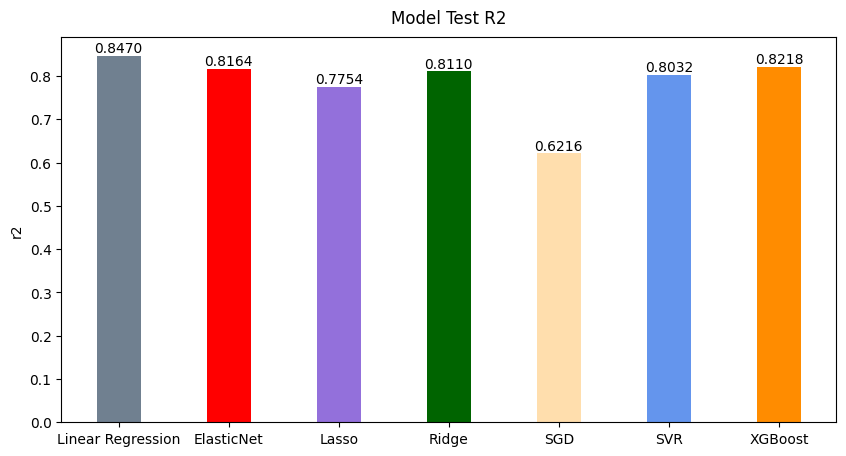

In [ ]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize = (10, 5))
colors = ['#708090', '#FF0000', '#9370DB',
          '#006400', '#FFDEAD', '#6495ED', '#FF8C00',
          '#FFC0CB', '#7FFF00', '#00008B', '#7FFFD4',
          '#FFFF00', '#800000']
# creating the bar plot
bar = plt.bar(test_results['model'], test_results['r2'],
        width = 0.4, color=colors)

plt.bar_label(bar, fmt='%.4f')
plt.ylabel("r2")
plt.title("Model Test R2", pad = 10)
plt.show()

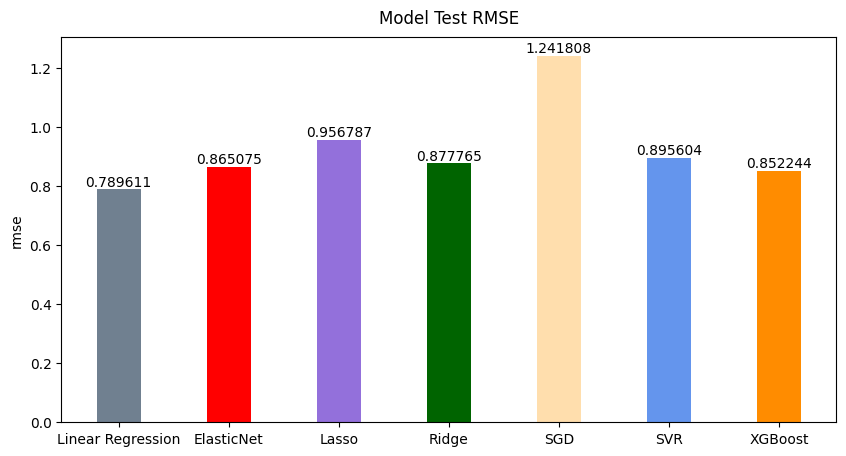

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar = plt.bar(test_results['model'], test_results['rmse'],
        width = 0.4, color=colors)

plt.bar_label(bar, fmt='%.6f')
plt.ylabel("rmse")
plt.title("Model Test RMSE", pad = 10)
plt.show()

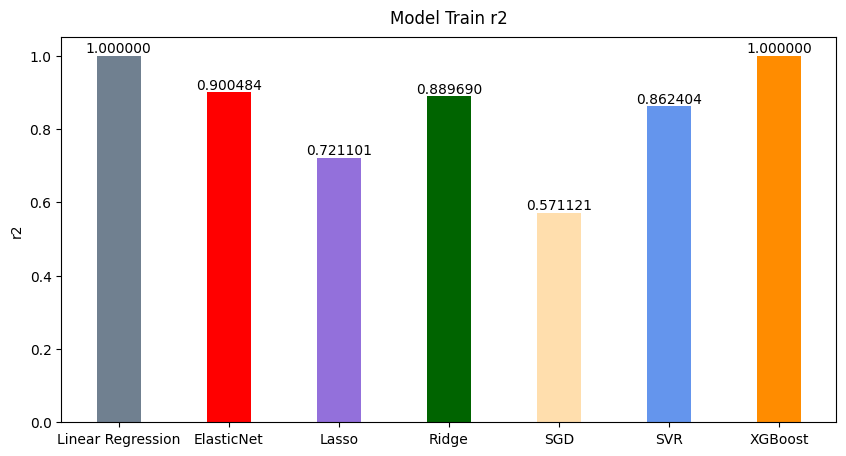

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar = plt.bar(training_results['model'], training_results['r2'],
        width = 0.4, color=colors)

plt.bar_label(bar, fmt='%.6f')
plt.ylabel("r2")
plt.title("Model Train r2", pad = 10)
plt.show()

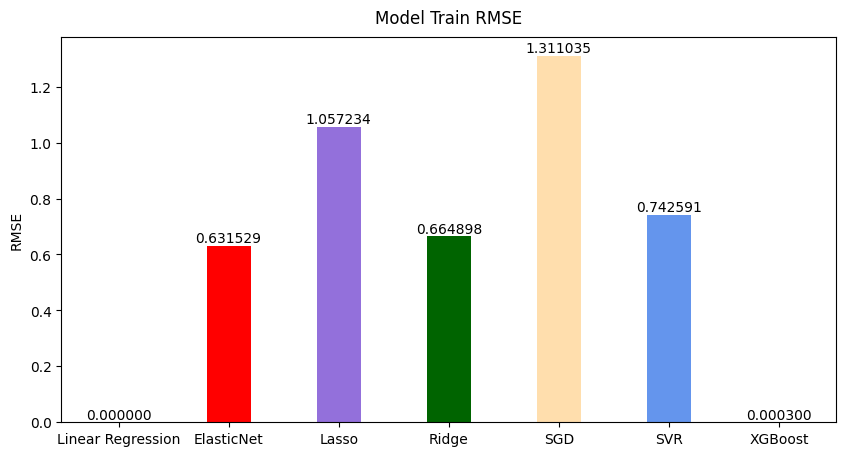

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
bar = plt.bar(training_results['model'], training_results['rmse'],
        width = 0.4, color=colors)

plt.bar_label(bar, fmt='%.6f')
plt.ylabel("RMSE")
plt.title("Model Train RMSE", pad = 10)
plt.show()

# MSS


In [ ]:
!unzip /content/Archive.zip -d MSS


Archive:  /content/Archive.zip
  inflating: MSS/bart_reduced605_MSS-071823.csv  
  inflating: MSS/elasticnet_reduced605_MSS-071823.csv  
  inflating: MSS/lasso_reduced605_MSS-071823.csv  
  inflating: MSS/lin_reduced605_MSS-071823.csv  
  inflating: MSS/ridge_reduced605_MSS-071823.csv  
  inflating: MSS/sgd_reduced605_MSS-071823.csv  
  inflating: MSS/svr_reduced605_MSS-071823.csv  
  inflating: MSS/xgboost_reduced605_MSS-071823.csv  


In [ ]:
import pandas as pd
import numpy as np
import os
from tabulate import tabulate

def get_best_params(metric, df):
  params = []
  means = []
  stds = []
  try:
    first_indeces = df.index[df['rank_test_'+metric]==1]
    for index in first_indeces:
      params.append(df['params'][index])
      means.append(df['mean_test_'+metric][index])
      stds.append(df['std_test_'+metric][index])
  except KeyError:
    return 'N/A'
  return params, means, stds

for item in os.listdir('/content/MSS'):
  if len(item.split('.')) > 1:
    if item.split('.')[1] == 'csv':
      df = pd.read_csv('MSS/'+item)
      print('\n\n\n', item.split('_')[0])
      print('\nr2', get_best_params('r2', df)[0])
      print(len(get_best_params('r2', df)[0]))
      print('\nmean r2', get_best_params('r2', df)[1])
      print('std r2', get_best_params('r2', df)[2])
      print('\nRMSE', get_best_params('neg_root_mean_squared_error', df)[0])
      print('\nmean RMSE', get_best_params('neg_root_mean_squared_error', df)[1])
      print('std RMSE', get_best_params('neg_root_mean_squared_error', df)[2])








 bart

r2 ["{'n_trees': 160, 'beta': 4, 'alpha': 0.9000000000000004}"]
1

mean r2 [0.4315381461163473]
std r2 [0.4193018187623205]

RMSE ["{'n_trees': 160, 'beta': 4, 'alpha': 0.9000000000000004}"]

mean RMSE [-1.1813695602643066]
std RMSE [0.3030983305377617]



 svr

r2 ["{'max_iter': 120, 'gamma': 0.0001, 'epsilon': 0.5, 'C': 10}"]
1

mean r2 [0.1903196803982661]
std r2 [0.3159284567957806]

RMSE ["{'max_iter': 630, 'gamma': 0.0001, 'epsilon': 0.8, 'C': 10}", "{'max_iter': 870, 'gamma': 0.0001, 'epsilon': 0.8, 'C': 10}"]

mean RMSE [-1.524939889741071, -1.524939889741071]
std RMSE [0.3913810046967353, 0.3913810046967353]



 sgd

r2 ["{'n_iter_no_change': 10, 'max_iter': 340, 'learning_rate': 'adaptive', 'eta0': 1e-05, 'alpha': 1}"]
1

mean r2 [-0.1708368241670257]
std r2 [0.7142574087604215]

RMSE ["{'n_iter_no_change': 5, 'max_iter': 160, 'learning_rate': 'adaptive', 'eta0': 1e-05, 'alpha': 1}"]

mean RMSE [-1.7149255163212582]
std RMSE [0.6782870782899043]



 elasticnet

r2 [

In [ ]:
# pip install git+https://github.com/JakeColtman/bartpy.git --upgrade

# pip install xgboost

# pip install pandas

# pip install numpy

# pip install sklearn

import pandas as pd
import numpy as np
import datetime

from xgboost import XGBRegressor
from bartpy.sklearnmodel import SklearnModel as BART
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor as SGD
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

def data_prep(path_to_csv):
  #assumes csv is in the same format as 'reduced605_metabolomicsdata-07112023.csv'
  reduced_data = pd.read_csv(path_to_csv)
  X = np.array(reduced_data.iloc[:, 4:])
  y = np.array(reduced_data['Candida Levels'])
  return train_test_split(X, y, test_size=.2, shuffle=True)

def linear_regression(X, y, datasetname):
  #linear regression
  lin = LinearRegression()
  lin_cv = cross_validate(lin, X, y, scoring=['r2', 'neg_root_mean_squared_error'], n_jobs=-1, cv=10, return_train_score=True)

  lin_df = pd.DataFrame(lin_cv)
  lin_df.to_csv('lin_random_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def grid_XGBoost(X, y, params, datasetname):
  #XGBoost
  xgb = XGBRegressor(random_state=4)
  xgb_grid = GridSearchCV(xgb, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], verbose=2, n_jobs=-1,refit=False)
  xgb_grid.fit(X, y)

  xgb_df = pd.DataFrame(xgb_grid.cv_results_)
  xgb_df.to_csv('xgb_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def grid_ElasticNet(X, y, params, datasetname):
  #Elastic Net
  en = ElasticNet(random_state=4)
  en_grid = GridSearchCV(en, param_distributions=params, cv=10,
                                scoring=['r2','neg_root_mean_squared_error'], verbose=2, n_jobs=-1,refit=False)
  en_grid.fit(X, y)

  en_df = pd.DataFrame(en_grid.cv_results_)
  en_df.to_csv('en_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def grid_Lasso(X, y,params, datasetname):
  #Lasso regression
  lasso = Lasso()
  lasso_grid = GridSearchCV(lasso, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
  lasso_grid.fit(X, y)

  lasso_df = pd.DataFrame(lasso_grid.cv_results_)
  lasso_df.to_csv('lasso_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def grid_Ridge(X, y, params, datasetname):
  #Ridge Regression
  ridge = Ridge()
  ridge_grid = GridSearchCV(ridge, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
  ridge_grid.fit(X, y)

  ridge_df = pd.DataFrame(ridge_grid.cv_results_)
  ridge_df.to_csv('ridge_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')


def grid_SGD(X, y, params, datasetname):
  #Linear Stochastic Gradient Descent Regression
  sgd = SGD()
  sgd_grid = GridizedSearchCV(sgd, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
  sgd_grid.fit(X, y)

  sgd_df = pd.DataFrame(sgd_grid.cv_results_)
  sgd_df.to_csv('sgd_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def grid_BART(X, y,params, datasetname):
  #Bayesian Additive Regression Tree
  bart = BART()
  bart_grid = GridSearchCV(bart, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
  bart_grid.fit(X, y)


  bart_df = pd.DataFrame(bart_grid.cv_results_)
  bart_df.to_csv('bart_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def grid_SVR(X, y, params, datasetname):
  #Support Vector Regression
  svr = SVR()
  svr_grid = GridSearchCV(svr, param_distributions=params, cv=10,
                                  scoring=['r2','neg_root_mean_squared_error'], n_jobs=-1,refit=False)
  svr_grid.fit(X, y)

  svr_df = pd.DataFrame(svr_grid.cv_results_)
  svr_df.to_csv('svr_grid_'+datasetname+'_'+str(datetime.datetime.now().date())+'.csv')

def RunGridModels(X, y, datasetname):

  linear_regression(X, y, datasetname)

  xgb_params = {
    'max_depth': [3, 5, 6, 10, 15, 20],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'n_estimators': [100, 500, 1000]}
  grid_XGBoost(X, y, xgb_params, datasetname)

  en_params = {
  'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100],
  'l1_ratio': np.arange(0, 1, 0.01)
  }
  grid_ElasticNet(X, y, en_params, datasetname)

  lasso_params = {
      'alpha':[1e-10,1e-5,1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
      'max_iter':np.arange(100, 1000, 10)
  }
  grid_Lasso(X, y, lasso_params, datasetname)

  ridge_params = {
      'alpha':[1e-10,1e-5,1e-3,.01,1,5,10,20,30,35,40,45,50,55,100],
      'max_iter':np.arange(100, 1000, 10)
  }
  grid_Ridge(X, y, ridge_params, datasetname)

  sgd_params = {
      'alpha':[1e-10,1e-5,1e-3,.01, .1, 1],
      'max_iter':np.arange(100,1000,10),
      'learning_rate': ['optimal','invscaling', 'adaptive'],
      'eta0':[1e-5, 1e-3, .01, .1],
      'n_iter_no_change': [2, 5, 10]
  }
  grid_SGD(X, y, sgd_params, datasetname)

  bart_params = {
      'n_trees' : np.arange(50,200,10),       #suggested is 50 to 200
      'alpha' : np.arange(.5, .95, .05),      #default is .95
      'beta' : np.arange(1, 10, 1)            #default is 2
  }
  BART(X, y, bart_params, datasetname)

  grid_svr_params = {
      'gamma' : [1e-4, 1e-3, .01, .1, 1, 1, 100],
      'C': [.01,.1,1,10,100],
      'epsilon': np.arange(.1, 1, .1),
      'max_iter': np.arange(100,1000,10)
  }
  grid_SVR(X, y, svr_params, datasetname)



#prep data and run models
X_train, X_test, y_train, y_test = data_prep('/content/reduced605_metabolomicsdata-07112023.csv')
RunGridModels(X_train, y_train, 'reduced605metabolomics')
